# K-means Clustering 



## Step 1: Image processing


In [ ]:

import requests
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

Image's shape     : (360, 480, 3)
Image's data type : float32
Image's data range: [0. 0. 0.] ~ [1. 1. 1.]


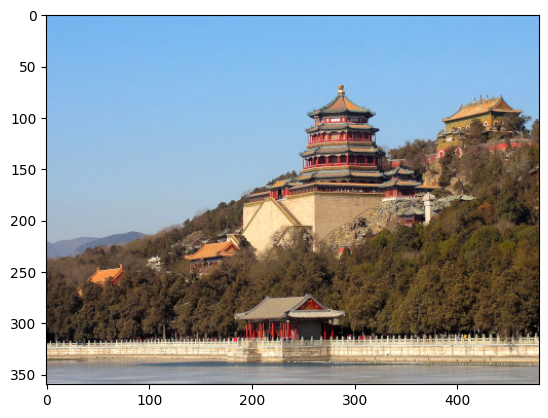

In [ ]:
def load_image_from_url(url):

    try:
        response = requests.get(url)
        if response.status_code == 200:
            im = Image.open(BytesIO(response.content))
            if im.mode != "RGB":
                im = im.convert("RGB")
            im_array = np.asarray(im).astype("float32") / 255.0
            return im_array
        else:
            print(f"Failed to retrieve the image: Status code {response.status_code}")
            return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None


im = load_image_from_url(
    "https://github.com/comp3314/hw-data/releases/download/hw3/summer_palace.jpg"
)
print(f"Image's shape     : {im.shape}")
print(f"Image's data type : {im.dtype}")
print(f"Image's data range: {np.min(im, axis=(0,1))} ~ {np.max(im, axis=(0,1))}")

plt.imshow(im)
plt.show()

Reshape the image as a collection of points within a three-dimensional color space. We'll reshape it into `(n_samples, n_features)`, where `n_samples` is the number of pixels in the image and `n_features` is 3, representing the RGB values of each pixel.

In [4]:
data = im.reshape(-1, 3)
print(data.shape)

(172800, 3)


## Step 2: Implement K-means with random initialization


In [5]:
import numpy as np


class KMeans:
    def __init__(self, n_clusters=8, max_iter=300, initialization="random"):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.cluster_centers_ = None
        self.initialization = initialization

        if self.initialization not in ["random", "fps"]:
            raise ValueError("Invalid initialization method.")

    def _initialize_centers_random(self, X):
        """
        Initialize the cluster centers by randomly selecting `n_clusters` samples.
        """
        # === Your code here ===
        # ======================
        self.cluster_centers_ = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]

    def _initialize_centers_fps(self, X):
        """
        Initialize the cluster centers by using the Farthest Point Sampling
        (FPS) algorithm.

        - It starts from a randomly selected sample as the first center.
        - Then in each iteration, it selects the sample that is the farthest
          from the set of selected centers.
        """
        # === Your code here ===
        # ======================
        n_samples = X.shape[0]
        centers = np.empty((self.n_clusters, X.shape[1]))
        centers[0] = X[np.random.choice(n_samples)]
        for i in range(1, self.n_clusters):
            distances = np.min(np.linalg.norm(X[:, np.newaxis] - centers[:i], axis=2), axis=1)
            centers[i] = X[np.argmax(distances)]
        
        self.cluster_centers_ = centers        

    def fit(self, X):
        if self.initialization == "random":
            self._initialize_centers_random(X)
        elif self.initialization == "fps":
            self._initialize_centers_fps(X)
        else:
            raise ValueError("Invalid initialization method.")

        # === Your code here ===
        # ======================

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.cluster_centers_, axis=2)
        return np.argmin(distances, axis=1)

Text(0.5, 1.0, 'Compressed Image (Random Init)')

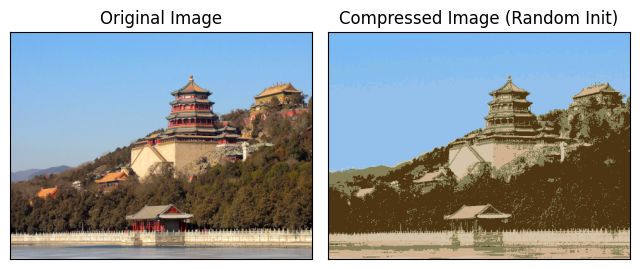

In [ ]:

kmeans = KMeans(n_clusters=10, max_iter=300, initialization="random")
kmeans.fit(data)
im_compressed = kmeans.cluster_centers_[kmeans.predict(data)].reshape(im.shape)

fig, ax = plt.subplots(1, 2, figsize=(8, 4), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(im)
ax[0].set_title("Original Image")
ax[1].imshow(im_compressed)
ax[1].set_title("Compressed Image (Random Init)")

## Step 3: Initialization by furthest point sampling

Text(0.5, 1.0, 'Compressed Image (FPS Init)')

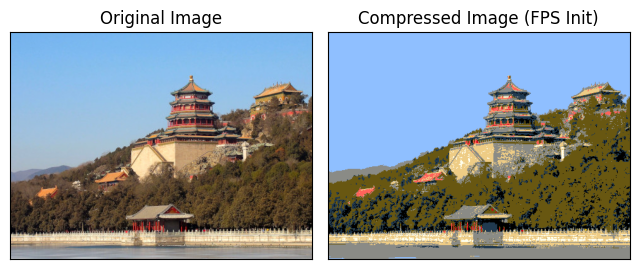

In [ ]:

kmeans = KMeans(n_clusters=10, max_iter=300, initialization="fps")
kmeans.fit(data)
im_compressed = kmeans.cluster_centers_[kmeans.predict(data)].reshape(im.shape)

fig, ax = plt.subplots(1, 2, figsize=(8, 4), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(im)
ax[0].set_title("Original Image")
ax[1].imshow(im_compressed)
ax[1].set_title("Compressed Image (FPS Init)")

## Step 4: Evaluate the compression qualitatively 

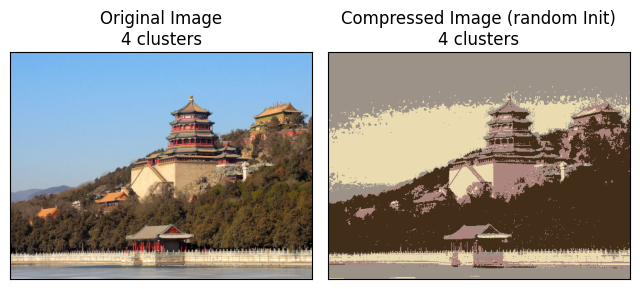

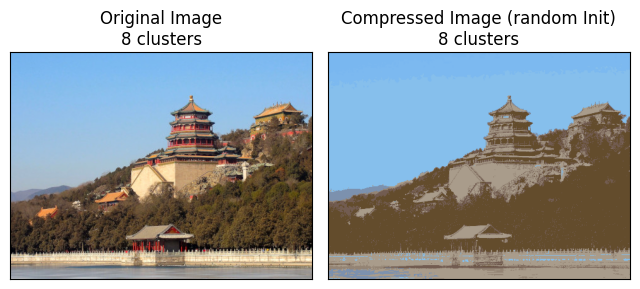

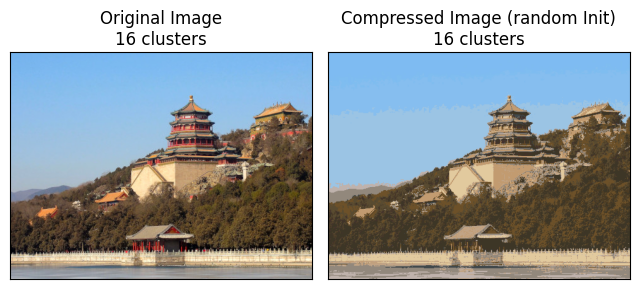

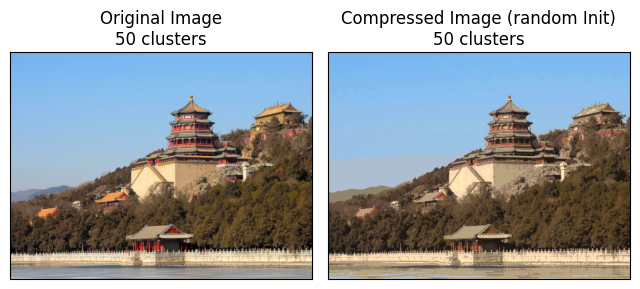

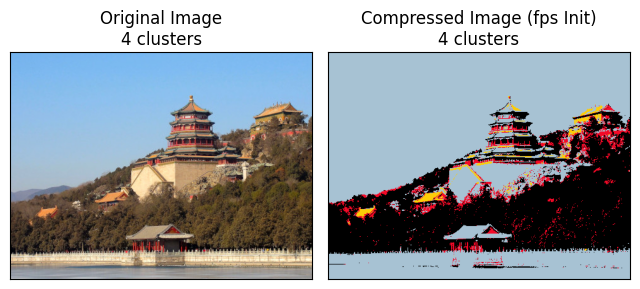

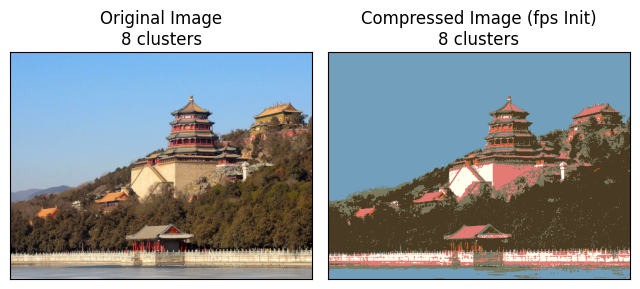

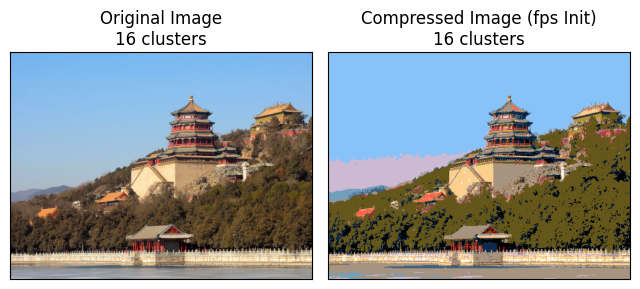

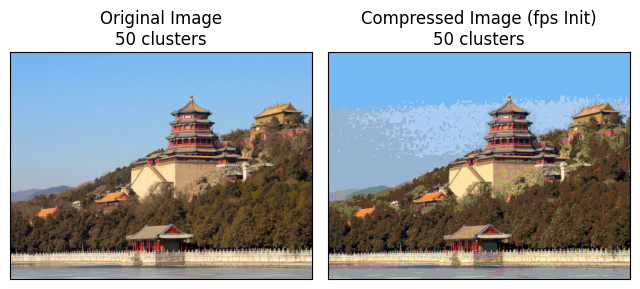

In [ ]:
# === Your code here ===
# ======================

plots = {}

def plot_compressed_images(im, data, n_clusters_list, initialization):
    for i, n_clusters in enumerate(n_clusters_list):
        fig, ax = plt.subplots(1, 2, figsize=(8, 4), subplot_kw=dict(xticks=[], yticks=[]))
        fig.subplots_adjust(wspace=0.05)

        kmeans = KMeans(n_clusters=n_clusters, max_iter=300, initialization=initialization)
        kmeans.fit(data)
        im_compressed = kmeans.cluster_centers_[kmeans.predict(data)].reshape(im.shape)
        plots[(n_clusters, initialization)] = im_compressed
        ax[0].imshow(im)
        ax[0].set_title(f"Original Image\n{n_clusters} clusters")
        
        ax[1].imshow(im_compressed)
        ax[1].set_title(f"Compressed Image ({initialization} Init)\n{n_clusters} clusters")
    
    plt.show()

n_clusters_list = [4, 8, 16, 128]
plot_compressed_images(im, data, n_clusters_list, initialization="random")
plot_compressed_images(im, data, n_clusters_list, initialization="fps")

## Step 5: Evaluate the compression quantitatively


1. Impelment a `mean_squared_error()` method to calculate the mean squared error.
2. Compare the MSE for the random and FPS initialization methods, by setting the number of clusters to 4, 8, and 16 for both methods.

Initialization: random, Clusters: 4, MSE: 0.03000768832862377
Initialization: fps, Clusters: 4, MSE: 0.037805644117836476
Initialization: random, Clusters: 8, MSE: 0.008286111988127232
Initialization: fps, Clusters: 8, MSE: 0.014851488321379384
Initialization: random, Clusters: 16, MSE: 0.0028625887352973223
Initialization: fps, Clusters: 16, MSE: 0.006155988079300264
Initialization: random, Clusters: 50, MSE: 0.0015657944604754448
Initialization: fps, Clusters: 50, MSE: 0.0024208890138215896


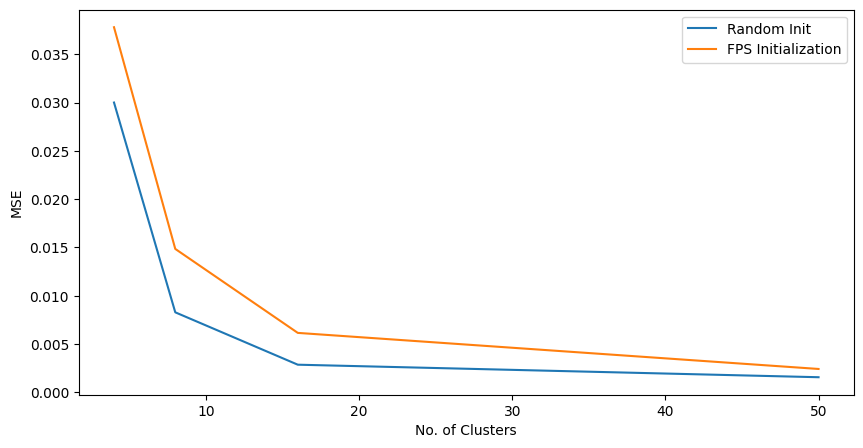

In [9]:
# === Your code here ===
# ======================

def mean_squared_error(X, X_compressed):

    return np.mean((X - X_compressed) ** 2)

def compare_mse(data, plots, n_clusters_list):
    mse_results = {
        "random": [],
        "fps": []
    }
    
    for n_clusters in n_clusters_list:
        for init_method in ["random", "fps"]:
            im_compressed = plots[(n_clusters, init_method)].reshape(-1, 3)
            mse = np.mean((data - im_compressed) ** 2)
            mse_results[init_method].append(mse)
            print(f"Initialization: {init_method}, Clusters: {n_clusters}, MSE: {mse}")
    
    return mse_results

mse_results = compare_mse(data, plots, n_clusters_list)
plt.figure(figsize=(10, 5))
plt.plot(n_clusters_list, mse_results["random"], label="Random Init")
plt.plot(n_clusters_list, mse_results["fps"], label="FPS Initialization")
plt.xlabel("No. of Clusters")
plt.ylabel("MSE")
plt.legend()
plt.show()